In [2]:
from langchain_ollama.llms import OllamaLLM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime as dt
from datetime import timedelta
import yfinance as yf
import equity_simulator as es

# model = "deepseek-r1"
# llm = OllamaLLM(model=model)

In [18]:

stocks =  ['AAPL', 'SHEL', 'JPM', 'COST']
start, end = dt.now() - timedelta(days=300), dt.now()

# stock_data = yf.download(stocks, start, end)
# stock_data = stock_data['Close']
# stock_data.head()

# Generate date range for one year
date_range = pd.date_range(start=start, end=end, freq='B')

# Generate random stock prices
np.random.seed(42)  # For reproducibility
dummy_data = {
    'JANU': np.random.uniform(low=100, high=200, size=len(date_range)),
    'MANU': np.random.uniform(low=50, high=150, size=len(date_range)),
    'SANU': np.random.uniform(low=200, high=300, size=len(date_range)),
    'DANU': np.random.uniform(low=150, high=250, size=len(date_range))
}

# Create a DataFrame
stock_data = pd.DataFrame(dummy_data, index=date_range)
stock_data['Date'] = stock_data.index.astype(int)
stock_data = stock_data[['Date', 'JANU', 'MANU', 'SANU', 'DANU']]
stock_data.head()

C:\Users\bono1\AppData\Local\Temp\ipykernel_11796\4087936369.py:22: FutureWarning: The behavior of .astype from datetime64[ns] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  stock_data['Date'] = stock_data.index.astype(int)


Date        JANU        MANU  \
2024-05-13 16:02:48.578519  1715616168578519000  137.454012   73.724909   
2024-05-14 16:02:48.578519  1715702568578519000  195.071431   82.539970   
2024-05-15 16:02:48.578519  1715788968578519000  173.199394  124.649141   
2024-05-16 16:02:48.578519  1715875368578519000  159.865848  114.963290   
2024-05-17 16:02:48.578519  1715961768578519000  115.601864  134.922341   

                                  SANU        DANU  
2024-05-13 16:02:48.578519  214.299168  239.052728  
2024-05-14 16:02:48.578519  276.151063  209.359245  
2024-05-15 16:02:48.578519  261.821806  217.910232  
2024-05-16 16:02:48.578519  210.112268  228.917124  
2024-05-17 16:02:48.578519  208.410681  199.844220

In [19]:
A = es.EquityPortfolio()
A.setHistoricPrices(stock_data.values)
A.setWeights([0.25, 0.25, 0.25, 0.25])
A.calculateMeanReturns()
display(A.getMeanReturns())
A.calculateCovMatrix()
display(A.getCovarianceMatrix())
A.setMontoCarloParameters(50, 100)

array([0.04251744, 0.09189904, 0.01353223, 0.02047482])

array([[ 0.09300307, -0.00110639,  0.00048048,  0.00987036],
       [-0.00110639,  0.23433673,  0.00048259,  0.00435037],
       [ 0.00048048,  0.00048259,  0.02821024, -0.00203585],
       [ 0.00987036,  0.00435037, -0.00203585,  0.04734768]])

In [20]:
A.runSimulation()
simulation_data = A.returnSimulationResults()

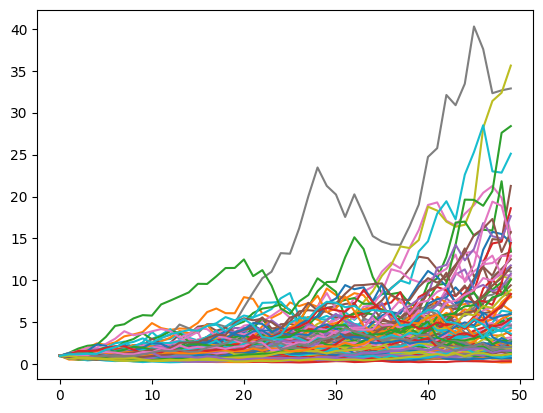

In [21]:
import matplotlib.pyplot as plt
plt.plot(simulation_data)

In [13]:
import numpy as np
print(np.clip(np.array(255, np.uint8), 0, 255) + np.clip(np.array(1, np.uint8), 0, 255))

0


C:\Users\bono1\AppData\Local\Temp\ipykernel_36148\2058199952.py:2: RuntimeWarning: overflow encountered in scalar add
  print(np.clip(np.array(255, np.uint8), 0, 255) + np.clip(np.array(1, np.uint8), 0, 255))


In [5]:
np.array(255, np.uint8) + np.array(1, np.uint8)

np.uint8(0)

In [10]:
np.iinfo(np.uint8).max

255